<a href="https://colab.research.google.com/github/ibrahimmhammed/Learning_projects/blob/main/Advanced_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score




**Reading Files**

In [298]:
data_train = pd.read_csv("//content//train titanic.csv")
data_test =  pd.read_csv("//content//test titanic.csv")

**Data Exploration**

In [299]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [300]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [301]:
data_train.shape , data_test.shape

((891, 12), (418, 11))

In [302]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [303]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [304]:
data_train.describe()  #describtion for numerical data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [305]:
data_train.describe(include=['O'])  #describtion for categorical data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Data Analysis**

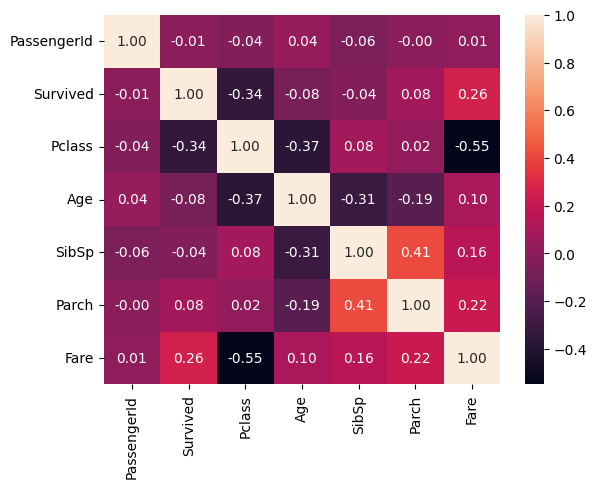

In [306]:
cor = data_train.corr()  #measuring correlation
sns.heatmap(cor,annot=True,fmt=".2f")
plt.show()

In [307]:
data_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
#to calculate the % of survived in every pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [308]:
data_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)
#to calculate the % of male and female survived

,Survived
Sex,
female,0.742038
male,0.188908


In [309]:
data_train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)
#to calculate % survived according to num of siblings and spouses

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [310]:
data_train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)
#to calculate % survived according to num of parents and children

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


**Data Visualization**

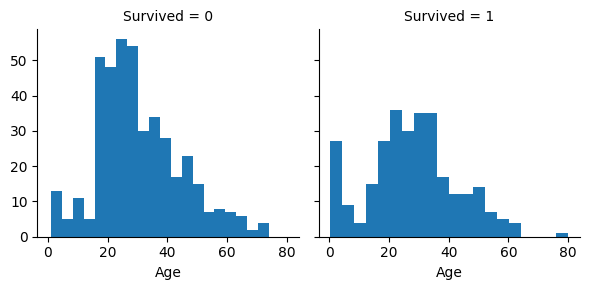

In [311]:
fg=sns.FacetGrid(data_train, col='Survived')
fg.map(plt.hist, 'Age', bins=20)
plt.show()

#survived or not according to age

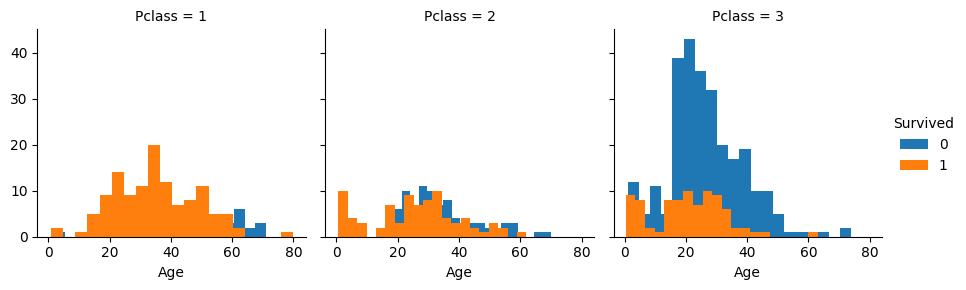

In [312]:
g= sns.FacetGrid(data_train, col='Pclass', hue='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend()
plt.show()
# #survived or not according to age in every pclass

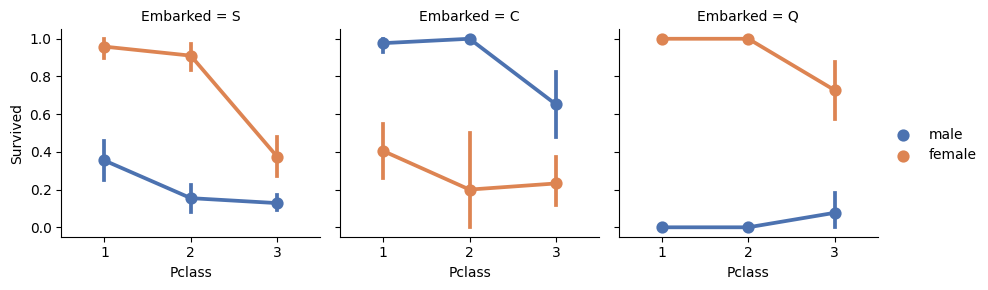

In [313]:
g= sns.FacetGrid(data_train, col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()
plt.show()
#survived male and female in every embark according to pclass

**Data Cleaning**

In [314]:
#we will fill nulls in age using 3 medians in every pclass
train_medians = data_train[['Age', 'Pclass']].groupby(['Pclass']).median()
train_medians

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [315]:
test_medians = data_test[['Age', 'Pclass']].groupby(['Pclass']).median()
test_medians

,Age
Pclass,
1,42.0
2,26.5
3,24.0


In [316]:
for index, row in data_train.iterrows():
    if pd.isnull(row['Age']):
        pclass = row['Pclass']
        median_age = train_medians.loc[pclass]['Age']
        data_train.at[index, 'Age'] = median_age

In [317]:
for index, row in data_test.iterrows():
    if pd.isnull(row['Age']):
        pclass = row['Pclass']
        median_age = test_medians.loc[pclass]['Age']
        data_test.at[index, 'Age'] = median_age

In [318]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [319]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Now we do not have nulls in Age but we have in (Embarked and cabin)**

In [320]:
data_train["Embarked"].mode() , data_test['Embarked'].mode()
#to fill nulls in Embarked (categorical )

(0    S
 Name: Embarked, dtype: object,
 0    S
 Name: Embarked, dtype: object)

In [321]:
def clean(d):
    d.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1, inplace=True)  # deleting unnecessary columns
    d["Embarked"] = d["Embarked"].fillna("S")  # fill nulls in the Embarked column with "S"
    d["Fare"] = d['Fare'].fillna(d['Fare'].median())
    d.reset_index(drop=True, inplace=True)  # reset the index after dropping rows
    return d

In [322]:
clean(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [323]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [324]:
clean(data_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,24.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,24.0,0,0,8.0500,S


In [325]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Converting Datatype**

In [326]:
#Converting Sex
data_train['Sex'] = data_train['Sex'].replace('male', 1)
data_train['Sex'] = data_train['Sex'].replace('female', 0)

data_test['Sex'] = data_test['Sex'].replace('male', 1)
data_test['Sex'] = data_test['Sex'].replace('female', 0)


In [327]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [328]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [329]:
#Converting Embarked

data_train['Embarked'] = data_train['Embarked'].replace('S', 0)
data_train['Embarked'] = data_train['Embarked'].replace('C', 1)
data_train['Embarked'] = data_train['Embarked'].replace('Q', 2)

data_test['Embarked'] = data_test['Embarked'].replace('S', 0)
data_test['Embarked'] = data_test['Embarked'].replace('C', 1)
data_test['Embarked'] = data_test['Embarked'].replace('Q', 2)



In [330]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [331]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


**Creating Models**

In [332]:
x= data_train.drop(["Survived"],axis=1) #difining x
y= data_train["Survived"] #difining x


In [333]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.75,shuffle=True,random_state=42) #spliting x,y

In [334]:
model1 = LogisticRegression(max_iter=1000,n_jobs=-1,solver="newton-cg")
model2= SGDClassifier()
model3= Perceptron()
model4= RandomForestClassifier(n_estimators=250,criterion="entropy")
model5= DecisionTreeClassifier(criterion="entropy",splitter="random")
model6= KNeighborsClassifier()
model7= GaussianNB()
model8= GradientBoostingClassifier(n_estimators=250,loss="exponential")

In [335]:
accuracies= []

In [336]:
def testing(model):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  accuracy = accuracy_score(pred,y_test)
  model_score = model.score(x_train,y_train)
  print("Model :" ,model)
  print ("accuracy score is \n", accuracy)
  print("model score is \n",model_score)
  accuracies.append(accuracy) #to see all accuracies together


In [337]:
testing(model1)


Model : LogisticRegression(max_iter=1000, n_jobs=-1, solver='newton-cg')
accuracy score is 
 0.8161434977578476
model score is 
 0.8008982035928144


In [338]:
testing(model2)

Model : SGDClassifier()
accuracy score is 
 0.600896860986547
model score is 
 0.624251497005988


In [339]:
testing(model3)

Model : Perceptron()
accuracy score is 
 0.7713004484304933
model score is 
 0.7829341317365269


In [340]:
testing(model4)

Model : RandomForestClassifier(criterion='entropy', n_estimators=250)
accuracy score is 
 0.7982062780269058
model score is 
 0.9820359281437125


In [341]:
testing(model5)

Model : DecisionTreeClassifier(criterion='entropy', splitter='random')
accuracy score is 
 0.7892376681614349
model score is 
 0.9820359281437125


In [342]:
testing(model6)

Model : KNeighborsClassifier()
accuracy score is 
 0.7130044843049327
model score is 
 0.7874251497005988


In [343]:
testing(model7)

Model : GaussianNB()
accuracy score is 
 0.7847533632286996
model score is 
 0.7994011976047904


In [344]:
testing(model8)  #the best model

Model : GradientBoostingClassifier(loss='exponential', n_estimators=250)
accuracy score is 
 0.8340807174887892
model score is 
 0.937125748502994


**using algorithm with new data (test data)**


In [345]:
Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(x_train,y_train)


GradientBoostingClassifier()

In [346]:
predicting= Gradient_Boosting.predict(data_test)


In [348]:
predicting

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,